In [ ]:
# Main system parameters: number of mics, number of samples in time
Nmics = 8
Nsamp = 100
 # Source: x,y coordinates: x: 0+, y: [-Y, +Y] where Y determined by pitch and Nmics
src = (0, 0)
# Spacing between microphones
pitch = 0.1
# proxy for sampling rate
dist_per_samp = 0.1
# Speed of sound in the medium
C = 0.5
# Time dilation factor for sinc pulse: how narrow
SincP = 5.0

In [64]:
# CODE Locations of microphones
first_mic = -((Nmics-1)*pitch)/2 # Assuming the total veritcal distance is (Nmics-1)*pitch
mics = [(0,first_mic+i*pitch) for i in range(0,Nmics)]
# Location of point obstacle
obstacle = (3,-1)

In [65]:
import numpy as np
# Source sound wave- time axis and wave
# sinc wave with narrowness determined by parameter
t = np.linspace(0,dist_per_samp*Nsamp,Nsamp) # CODE Nsamp time instants with spacing of dist_per_samp

def wsrc(t):
    return np.sinc(SincP*t)

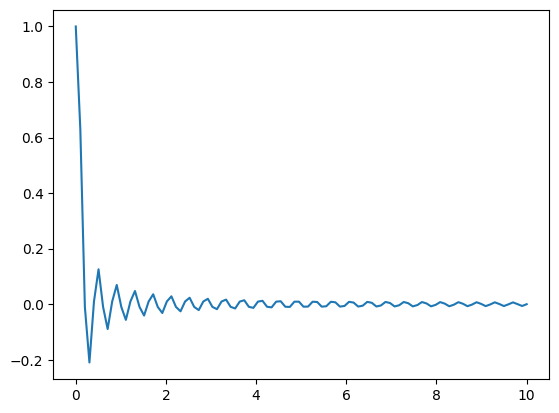

In [66]:
import matplotlib.pyplot as plt
plt.plot(t, wsrc(t))


In [67]:
import math
# Distance from src to a mic after reflecting through pt
def dist(src, pt, mic):
    d1 = math.sqrt((pt[1]-src[1])**2 + (pt[0]-src[0])**2) # CODE distance from src to pt
    d2 = math.sqrt((pt[1]-mic[1])**2 + (pt[0]-mic[0])**2) # CODE distance from pt to mic
    return d1 + d2

In [68]:
Nmics = 64
Nsamp = 100
C = 1.0
obstacle = (3, -1)
pitch = 0.1
dist_per_samp = 0.1
first_mic = -((Nmics-1)*pitch)/2 # Assuming the total veritcal distance is (Nmics-1)*pitch
mics = [(0,first_mic+i*pitch) for i in range(0,Nmics)]
t = np.array([dist_per_samp/C*i for i in range(0,Nsamp)]) # CODE Nsamp time instants with spacing of dist_per_samp

In [69]:
mic_samp = {}
for mic in mics:
    time_travelled = dist((0,0), obstacle, mic)/C
    mic_samp[mic] = wsrc(t-time_travelled)

In [70]:
from bisect import bisect

grid = []
for i in range(len(mics)):
    grid_row = []
    for j in range(0,Nsamp):
        grid_row.append(0)
        for mic in mics:
            time_travelled = dist((0,0), (j*dist_per_samp,mics[i][1]), mic)/C
            time_index = bisect(t, time_travelled)
            try:
                grid_row[-1] += mic_samp[mic][time_index]
            except IndexError:
                grid_row[-1] += 0
    grid.append(grid_row)

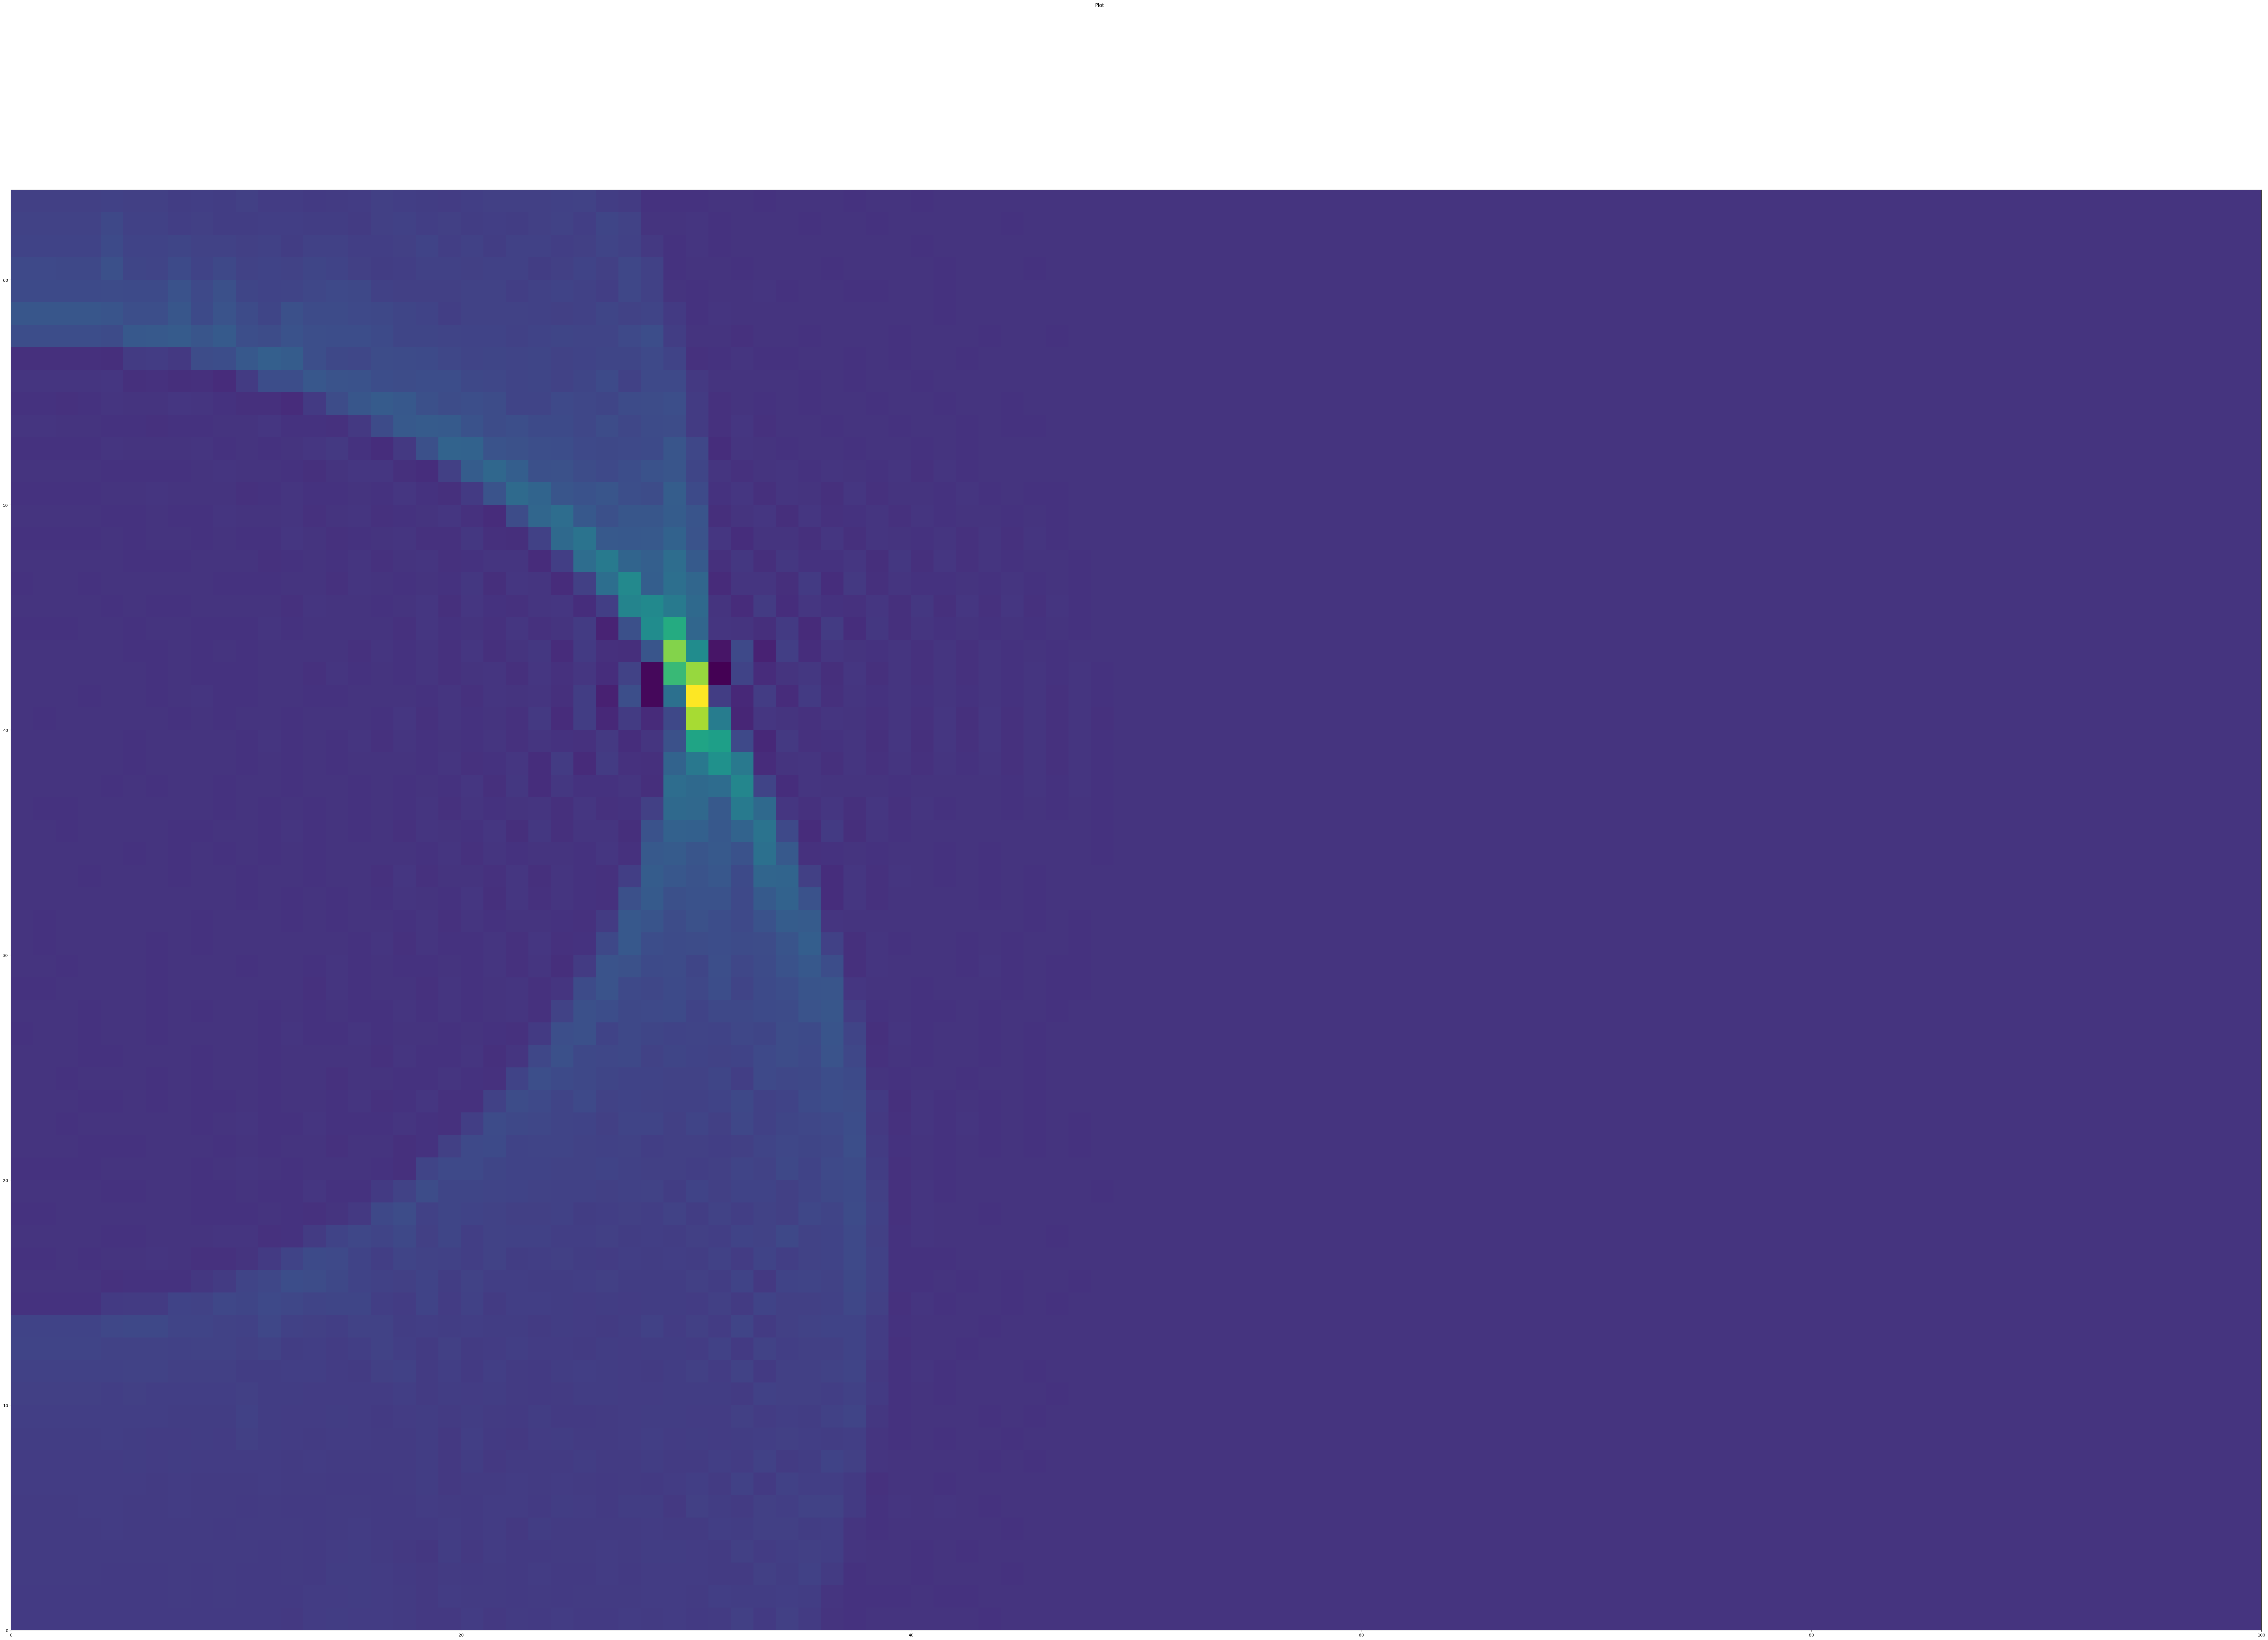

In [76]:
figsize=(Nsamp, Nmics)
fig = plt.figure(1,figsize=figsize)
plt.suptitle("Plot")
ax = plt.gca()
ax.set_xlim([0, figsize[0]])
ax.set_ylim([0, figsize[1]])
grid = np.array(grid)
im = plt.imshow(np.zeros((1,1), float) , cmap = 'viridis' , interpolation = 'none' , origin='upper',
                extent = [0, figsize[0], 0, figsize[1]], vmin=np.min(grid), vmax=np.max(grid))
im.set_data(grid)

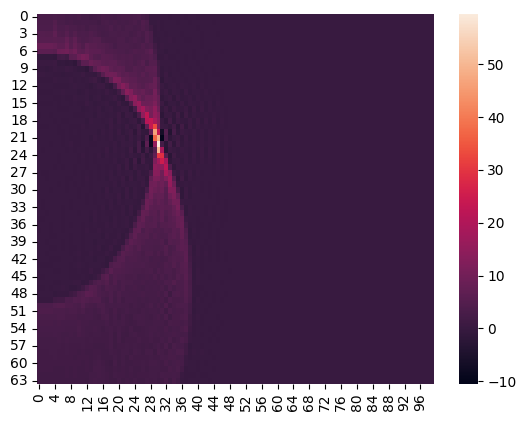

In [71]:
import seaborn as sn
hm = sn.heatmap(data = grid)
plt.show()